<a href="https://colab.research.google.com/github/tuccib/CUNY_LAG/blob/Analytics/Copy_of_Python_Advanced_Pandas_DataWrangling_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1 : Python Data Analysis using salaries dataset

# Data Exploration:  This should include summary statistics, means, medians, quartiles, or any other relevant information about the data set. 

In [14]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
df = pd.read_csv('https://raw.githubusercontent.com/niteen11/data301_predictive_analytics_machine_learning/main/data/Salaries.csv')

In [16]:
type(df)

pandas.core.frame.DataFrame

In [17]:
# 397 rows = 397 employees
df.shape

(397, 7)

In [18]:
df.head()

,Unnamed: 0,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,1,Prof,B,19,18,Male,139750
1,2,Prof,B,20,16,Male,173200
2,3,AsstProf,B,4,3,Male,79750
3,4,Prof,B,45,39,Male,115000
4,5,Prof,B,40,41,Male,141500


In [19]:
df.tail()

,Unnamed: 0,rank,discipline,yrs.since.phd,yrs.service,sex,salary
392,393,Prof,A,33,30,Male,103106
393,394,Prof,A,31,19,Male,150564
394,395,Prof,A,42,25,Male,101738
395,396,Prof,A,25,15,Male,95329
396,397,AsstProf,A,8,4,Male,81035


In [20]:
df.describe()

,Unnamed: 0,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000,397.000000
mean,199.000000,22.314861,17.614610,113706.458438
std,114.748275,12.887003,13.006024,30289.038695
min,1.000000,1.000000,0.000000,57800.000000
25%,100.000000,12.000000,7.000000,91000.000000
50%,199.000000,21.000000,16.000000,107300.000000
75%,298.000000,32.000000,27.000000,134185.000000
max,397.000000,56.000000,60.000000,231545.000000


# Mean/median of all salaries

In [21]:
# Mean of all salaries
df.salary.mean()

113706.45843828715

In [22]:
# Median of all salaries
df.salary.median()

107300.0

# Median salary between gender and/or rank(title) Etc...


Making a new Data Frame that only has the columns 'sex' and 'salary'

In [23]:
df1 = df[['sex','salary']]

In [24]:
df1.head()

,sex,salary
0,Male,139750
1,Male,173200
2,Male,79750
3,Male,115000
4,Male,141500


Finding the Median salary for all males

In [25]:
df1[df1['sex']=='Male'].salary.median()

108043.0

Finding the Median salary for all females

In [26]:
df1[df1['sex']=='Female'].salary.median()

103750.0

Comparing the Mean salary of Males and Females

In [86]:
df_male = df1[df1['sex']=='Male'].salary.mean()
round(df_male)

115090

In [87]:
df_female = df1[df1['sex']=='Female'].salary.mean()
round(df_female)

101002

In [ ]:
# The difference between mean salaries of male and female


In [37]:
round(df_male - df_female)

14088

# Data Wrangling – perform some basic transformations on the data

People who have 20 years of experience (Total: 157), (Mean Salary: 122,520.66)

In [50]:
df2 = df

In [54]:
df2[df2['yrs.service']>=20].count()

Unnamed: 0       157
rank             157
discipline       157
yrs.since.phd    157
yrs.service      157
sex              157
salary           157
dtype: int64

In [57]:
round(df2[df2['yrs.service']>=20].salary.mean(), 2)

122520.66

Comparing the salaries of people who have 20+ years of experience vs less than 20 years of experience

In [72]:
df_20 = df2[df2['yrs.service']>=20].salary.mean()
df_19 = df2[df2['yrs.service']<20].salary.mean()

In [81]:
print("20+ years experience:", round(df_20)) 
print("Under 20 years experience:", round(df_19))
print("Difference:", round(df_20 - df_19))

20+ years experience: 122521
Under 20 years experience: 107941
Difference: 14580


People who have salary of greater than or equal to 200,000

In [39]:
df2[df2['salary']>=200000]

,Unnamed: 0,rank,discipline,yrs.since.phd,yrs.service,sex,salary
43,44,Prof,B,38,38,Male,231545
249,250,Prof,A,29,7,Male,204000
364,365,Prof,A,43,43,Male,205500


Your Findings here...


Three workers make over $200,000 and the three tend to have extensive experince and are all male. 

# Rename values, subset columns, etc

In [82]:
df2.rename (columns={'yrs.since.phd':'years_since_phd', 'yrs.service':'years_service'})

,Unnamed: 0,rank,discipline,years_since_phd,years_service,sex,salary
0,1,Prof,B,19,18,Male,139750
1,2,Prof,B,20,16,Male,173200
2,3,AsstProf,B,4,3,Male,79750
3,4,Prof,B,45,39,Male,115000
4,5,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...,...
392,393,Prof,A,33,30,Male,103106
393,394,Prof,A,31,19,Male,150564
394,395,Prof,A,42,25,Male,101738
395,396,Prof,A,25,15,Male,95329


# Create some simple visualizations showing some simple statistics

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


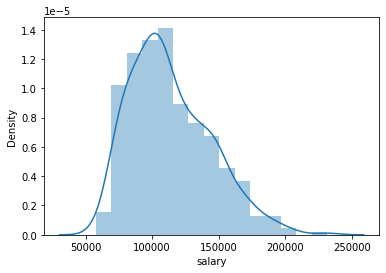

In [84]:
import seaborn as sns


sns.distplot(df2['salary'])


BT: this is a density distribution of Salaries 

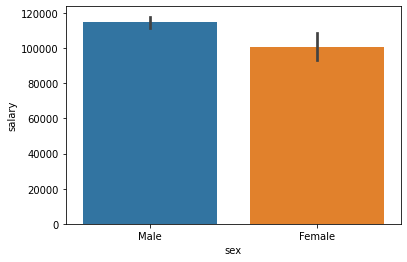

In [103]:
sns.barplot(x='sex', y='salary', data=df2)

BT: These are bar plots of mean salaries (115,090  for males, 101,002 for females). Seaborn assumed the mean was wanted, even though the mean wasn't specified in the barplot(). 

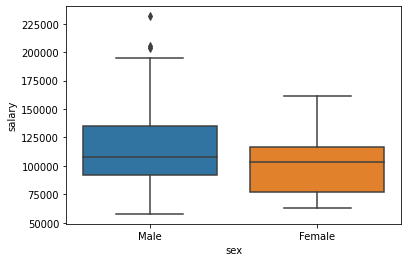

In [104]:
sns.boxplot(x='sex', y='salary', data=df2)

In [ ]:
BT: These are boxplots of salaries for males and females, showing shaded area between 25th and 75th percentiles. 
Two men making over $200K bring up the male average considerably. 


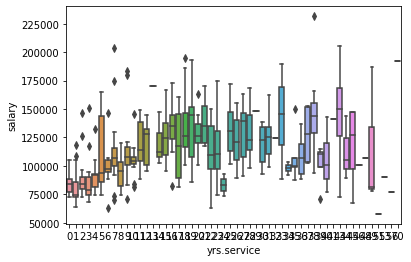

In [106]:
sns.boxplot(x='yrs.service', y='salary', data=df2)

In [ ]:
BT: This is boxplot of salaries vs years of service. 

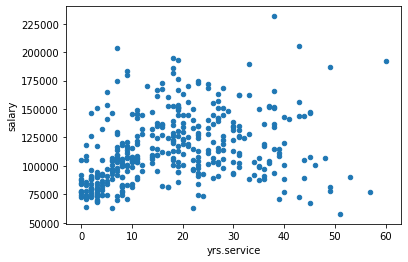

In [94]:
df2.plot(kind = "scatter", x = 'yrs.service', y = "salary")

BT: This is a scatter plot of salary vs years of service

In [ ]:
male_data = df[df['sex']=='Male']
male_data.groupby(['yrs.service'])['salary'].count().plot()
female_data = df[df['sex']=='Female']
female_data.groupby(['yrs.service'])['salary'].count().plot()


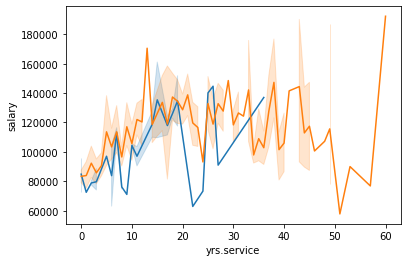

In [98]:
sns.lineplot(x='yrs.service', y='salary', data=female_data)
sns.lineplot(x='yrs.service', y='salary', data=male_data)

# Draw some conclusions based on the data.  What did you discover?

Based on the analysis performed above, the conclusions are as follows:

Your Findings here...



I also discovered that the -

 Your Findings here...





## Males (yellow) and Females (blue) showed an upward trend in salary with years of service from 0 to 20 years, with males making more than females. After 20 years, male salaries level off, and there is isn't enough data for females to generalize. The male average salary ($115K vs $101K for females) was brought up substantially by two men making over $200K. The median salaries are quite similar for males ($108K) and females ($104K).